# Fuerzas de ligadura en el caso de rodadura

[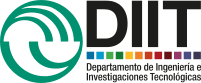](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2025 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

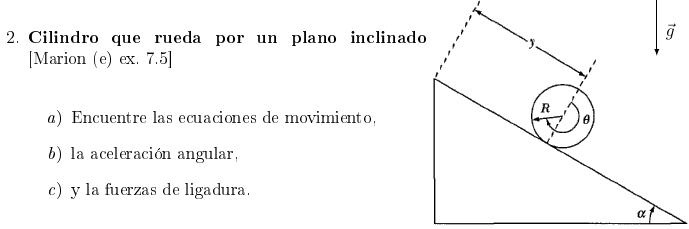

## Resolución
Si bien la ventaja de la formulación Lagrangiana es el evitar tener que pensar en las fuerzas de ligadura para centrarse en obtener la dinámica, usualmente desde el punto de vista ingenieríl estas fuerzas son un interrogante de la etapa de diseño.

In [1]:
import sympy as sm # importamos funciones de cálculo simbólico
from sympy.physics import mechanics as me # de sympy utilizaremos funciones de mecánica
me.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración

In [2]:
# parámetros físicos del sistema
m, alfa, R, g = sm.symbols('M, alpha, R, g', positive=True)

In [3]:
e = me.ReferenceFrame('e') # sistema de referencia en coordenadas cartesianas
g_vector = g* e.y # vector gravedad en este sistema de referencia

y, zeta = me.dynamicsymbols('y, theta')

### Ligaduras
La condición de rodadura puede escribirse

$$
f(y,\theta) = y - R \theta = 0,
$$
donde $\hat{y}$ apunta en la dirección de descenso.

In [4]:
f1 = sm.Eq(y- R* zeta, 0) # ligadura l como función homogénea
f1

Y cómo hay una única función de ligadura, solo se necesita un único multiplicador de Lagrange, que llamaremos $\lambda_1$.

In [5]:
lambda1 = sm.Symbol('lambda_1') # multiplicador de Lagrange
lambda1

## Euler-Lagrange con multiplicadores

$$
\boxed{
\frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial}{\partial \dot{q_i}} \mathcal{L} 
- \frac{\partial}{\partial q_i} \mathcal{L} 
= \sum_k \lambda_k(t) \frac{\partial}{\partial q_i} f_k
}
\quad
\left\{
  \begin{array}{l}
  i= 1,2,\dots,n \quad \text{coordenadas generalizadas} \\
  k= 1,2,\dots,p \quad \text{condiciones cinemáticas, de restricción o ligaduras}
  \end{array}
\right.
$$

### Energía cinética de traslación

El eje $\hat{e}_y$ está alineado con la dirección de descenso.  

In [6]:
cilindro_r = y * e.y # posición del centro de masa del cilindro
cilindro_r

In [7]:
def energíaCinéticaTraslación(masa, posición, marcoDeReferencia):
    """
    A partir de la masa y posición de una partícula puntual en un marco de referencia devuelve su energía cinética.
    
    Parámetros
    ----------
    masa: (sympy.core.symbol.Symbol)
        De un partícula
    posición: (sympy.physics.vector.vector.Vector)
        del centro de masa de la partícula
    marcoDeReferencia: (sympy.physics.vector.frame.ReferenceFrame)
        En el que se expresa la posición
    
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía cinética del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
        Energía cinética, T = (m/2) \dot{\vec{r}} \cdot\dot{\vec{r}}
    """
    velocidad = posición.dt(marcoDeReferencia)
    unMedio = sm.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
    T_traslación = sm.Eq(
        sm.Symbol('T_{traslación}'),
        unMedio* masa* velocidad.dot(velocidad)
        ).simplify()
    return T_traslación

In [8]:
cilindro_T_traslación = energíaCinéticaTraslación(m, cilindro_r, e) # energía cinética de traslación del cilindro
cilindro_T_traslación

### Energía cinética de rotación

El momento de inercia para un cilindro de masa $m$ y radio $R$ girando en torno a su eje longitudinal de simetría
$$
I = \frac{1}{2} m R^2.
$$

In [9]:
unMedio = sm.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5
cilindro_I = sm.Eq(
    sm.Symbol('I'),
    unMedio* m* R**2
) # momento de inercia de rotación en torno a su eje de simetría longitudinal
cilindro_I

In [10]:
def energíaCinéticaRotación(momentoDeInercia, velocidadAngular):
    """
    Calcula la energía cinética de un cuerpo extenso (no puntual) que rota en torno a un eje.

    Parámetros
    ----------
    momentoDeInercia : Multiplicación Sympy (sympy.core.mul.Mul)
        Expresada en referencia al eje de rotación para la velocidadAngular.
    velocidadAngular : Multiplicación Sympy (sympy.core.mul.Mul)
        Velocidad de rotación en torno a un eje.

    Retorna
    -------
    Igualdad Sympy (sympy.Equality)
        Energía cinética de rotación (I/2)* omega**2
    """
    unMedio = sm.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5
    T_rotación = sm.Eq(
        sm.Symbol('T_{rotación}'),
        unMedio* momentoDeInercia* velocidadAngular**2
     ).simplify()
    return T_rotación

In [11]:
cilindro_T_rotación = energíaCinéticaRotación(cilindro_I.rhs, zeta.diff()) # energía cinética de rotación del cilindro
cilindro_T_rotación

### Energía potencial gravitatoria del cilindro

In [12]:
def energíaPotencialGravitatoria(masa, posición, aceleracionGravitatoria):
    """
    Retorna la energía potencial gravitatoria de una partícula de masa m cuya posición r está dada en un sistema de referencia en el cual g es la aceleración gravitatoria terrestre.
    
    Parámetros
    ----------
    aceleracionGravitatoria: (sympy.physics.vector.vector.Vector)
        vector orientado según el sistema de referencia
    masa: (sympy.core.symbol.Symbol
        del cuerpo en cuestión
    posición: (sympy.core.symbol.Symbol)
        del centro de masa en un sistema de referencia relacionable con el de aceleracionGravitatoria
    
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía potencial del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    coordenadaGeneralizada: Símbolo Sympy (sympy.core.symbol.Symbol)
        V = - (m \vec{aceleracionGravitatoria}) \cdot{posición}
    """
    V_gravitatoria = sm.Eq(
        sm.Symbol('V_{gravitatoria}'),
        - (masa* aceleracionGravitatoria).dot(posición)
        ).simplify()
    return V_gravitatoria

Para determinar la descomposición del vector de aceleración gravitatoria, debemos pensar que si $\hat{e}_y$ está en la dirección de descenso del cilindro, $\hat{e}_x$ apunta hacia abajo y la izquierda del dibujo.

In [ ]:
g_vector = g * (sm.sin(alfa)* e.y + sm.cos(alfa)* e.x) # vector gravedad en este sistema de referencia

In [14]:
cilindro_V_gravitatoria = energíaPotencialGravitatoria(m, cilindro_r, g_vector) # energía potencial gravitatoria del cilindro
cilindro_V_gravitatoria

### Ecuaciones homogéneas de Euler-Lagrange

In [15]:
def eulerLagrange(T, V, coordenadaGeneralizada):
    '''    
    Esta función devuelve la ecuación de Euler-Lagrange para una coordenada generalizada a partir de las energías del sistema.
    
    Parámetros
    ----------
    T : Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía cinética del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    V : Igualdad Sympy (sympy.core.relational.Equality)
        En su lado derecho explicita la energía potencial del sistema en función de coordenadas y velocidades generalizadas y el tiempo.
    coordenadaGeneralizada: Símbolo Sympy (sympy.core.symbol.Symbol)
        Para la que quiere obtenerse la ecuación de Euler-Lagrange
        
    Retorna
    -------
    Igualdad Sympy (sympy.core.relational.Equality)
        Ecuación de Euler-Lagrange homogénea para la coordenadaGeneralizada
    '''
    lagrangiano = (T.rhs - V.rhs).expand()
    t = sm.Symbol('t') # como se deriva respecto al tiempo con la función diff se declara t como símbolo 
    return sm.Eq(
        lagrangiano.diff(coordenadaGeneralizada.diff(t)).diff(t)
        - lagrangiano.diff(coordenadaGeneralizada) 
        , 0
    ).simplify()

In [16]:
T = sm.Eq(
    sm.Symbol('T'),
    cilindro_T_traslación.rhs + cilindro_T_rotación.rhs
)
V = sm.Eq(
  sm.Symbol('V'),
  cilindro_V_gravitatoria.rhs # energía potencial total del cilindro
)

In [17]:
y_EL_homogenea = eulerLagrange(T, V, y)
y_EL_homogenea

In [18]:
zeta_EL_homogenea = eulerLagrange(T, V, zeta)
zeta_EL_homogenea

### Fuerzas ligadura

### Lagrangiano
Como rueda sobre su eje no hay que olvidar su momento de inercia $I= M R^2$ a la hora de escribir la energía cinética

$$
T = \frac{M}{2} \dot{y}^2 + \frac{I}{2} \dot{\theta}^2 = \frac{M}{2} \left( \dot{y}^2+ \frac{1}{2} R^2 \dot{\theta}^2 \right).
$$

La energía potencial solo depende del campo gravitatorio

$$
V = M g (l - y ) \sin(\alpha),
$$
donde se toma el cero de potencial en la base y $l$ es la longitud de la superficie inclinada.
Se obtiene entonces

$$
\mathcal{L}(y, \dot{y}, \dot{\theta}) = \frac{M}{2} \left( \dot{y}^2+ \frac{1}{2} R^2 \dot{\theta}^2 \right) - M g (l - y ) \sin(\alpha).
$$

Como interesa obtener las fuerza de ligadura no se utiliza la relación de restricción $f(y,\theta)$ para reducir los grados de libertad a uno solo, sino que se plantea

$$
\left\{
  \begin{array}{l} 
    \frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial}{\partial \dot{y}} \mathcal{L}
    - \frac{\partial}{\partial y} \mathcal{L}
    =
    \lambda \frac{\partial}{\partial y} f 
    \\
    \frac{\mathrm{d}}{\mathrm{d} t} \frac{\partial}{\partial \dot{\theta}} \mathcal{L}
    - \frac{\partial}{\partial \theta} \mathcal{L}
    =
    \lambda \frac{\partial}{\partial \theta} f
  \end{array}
\right. ,
$$
que resultan en

$$
\left\{
  \begin{array}{l} 
    M \ddot{y}
    - M g \sin(\alpha)
    =
    \lambda\\
    \frac{1}{2} M R^2 \ddot{\theta}
    =
    \lambda R
  \end{array}
\right. .
$$

### Fuerzas generalizadas
Del sistema de ecuaciones de Euler-Lagrange habría que obtener el valor de $\lambda$.
Pero habiendo tres incógnitas: $\lambda, \ddot{y}$ y $\ddot{\theta}$ con dos ecuaciones esto no es posible.
Una 3.er ecuación involucrando estas variables se obtiene diferenciando la función de restricción de ligadura dos veces

$$
\begin{aligned}
f(y,\theta) &= y - R \theta = 0,\\
\frac{\mathrm{d^2}}{\mathrm{d} t^2} f(y,\theta) &=  \ddot{y} - R \ddot{\theta} =0 \implies \ddot{y} = R \ddot{\theta} .
\end{aligned}
$$
Con esto se elimina una incógnita en el sistema

$$
\left\{
  \begin{array}{l} 
    M g \sin(\alpha)
    - M \ddot{y}
    - \lambda = 0\\
    - \frac{1}{2} M R \ddot{y}
    + \lambda R = 0
  \end{array}
\right. ,
$$
del cuál puede obtenerse

$$
\lambda = - \frac{1}{3} M g \sin(\alpha),
$$
y con este multiplicador de Lagrange se obtienen las fuerzas generalizadas de ligadura


$$
\left\{
  \begin{array}{l} 
    Q_y = \lambda \frac{\partial}{\partial y} f = \lambda = - \frac{1}{3} M g \sin(\alpha)\\
    Q_\theta = \lambda \frac{\partial}{\partial \theta} f = - \lambda R = \frac{1}{3} M g R \sin(\alpha)
  \end{array}
\right. ,
$$

la primera es la fuerza aplicada en el centro de masa del cilindro en la dirección $\hat{y}$, y la segunda es el correspondiente torque.

## Ecuaciones de la dinámica
Basta con reemplazar el multiplicador $\lambda$ en el sistema de ecuaciones de Euler-Lagrange para describir la dinámica en función de cualquiera de las coordenadas alternativas

$$
\left\{
  \begin{array}{l} 
    \ddot{y} = - g \sin(\alpha) (\frac{1}{3} - 1)= \frac{2}{3} g \sin(\alpha) \\
    \ddot{\theta} = \frac{2}{3} \frac{g}{R} \sin(\alpha)
  \end{array}
\right. .
$$